In [8]:
# Import Requirements
import pandas as pd
from tqdm import tqdm as tq
import numpy as np
import matplotlib.pyplot as plt
from pre_processing_posts import pre_processing_posts as pre_posts
import datetime

RQ3. What is the most common time in which users publish their posts?

In [3]:

for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_posts.csv',usecols=['cts'],sep='\t',chunksize=10000))):
    chunk=pre_posts(chunk)
    df_time=pd.DatetimeIndex(chunk.cts).hour
    if i==0:
        n,bins=np.histogram(df_time,bins=np.arange(0,25))
        print(n)
        n=np.array(n)
    else:
        df_time=pd.DatetimeIndex(chunk.cts).hour
        n1,bins=np.histogram(df_time,bins=np.arange(0,25))
        n1=np.array(n1)
        n=n+n1
tic_label=['12am-1-am']
for i in range(0,11):
    tic_label.append(str(i+1)+'am'+'-'+str(i+2)+'am')
tic_label.append('12 noon-1 pm')
for i in range(0,11):
    tic_label.append(str(i+1)+'pm'+'-'+str(i+2)+'pm')
    
print('The most common time the users publish their posts is {0} with {1} numbers of user posting'.format(tic_label[np.argmax(n)],np.amax(n)))
plt.bar(bins[1::],n,tick_label=tic_label)
plt.xticks(rotation=90)
plt.show()

4it [00:00, 17.69it/s]

[369 339 283 327 297 269 249 253 301 349 367 368 424 456 528 566 511 598
 573 589 586 548 432 418]


4272it [03:46, 18.88it/s]


The most common time the users publish their posts is 7pm-8pm with 2499758 numbers of user posting


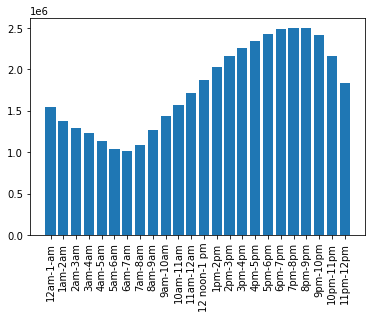

In [31]:
print('The most common time the users publish their posts is {0} with {1} numbers of user posting'.format(tic_label[np.argmax(n)],np.amax(n)))
plt.bar(bins[1::],n,tick_label=tic_label)
plt.xticks(rotation=90)
plt.show()

In [5]:
def time_in_seconds(time_list):
    seconds=[]
    for i in time_list:
        for j in i:
            date_time = datetime.datetime.strptime(j, "%H:%M:%S")
            a_timedelta = date_time - datetime.datetime(1900, 1, 1)
            seconds.append(a_timedelta.total_seconds())
            seconds.sort()
    return seconds
        


In [2]:
def post_interval(time_list):
    bins_custom=time_in_seconds(time_list)
    print(bins_custom)
    for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_posts.csv',usecols=['cts'],sep='\t',chunksize=10000))):
        chunk=pre_posts(chunk)
        
        try:
            df_time=pd.DatetimeIndex(chunk.cts).hour*3600+pd.DatetimeIndex(chunk.cts).minute*60+pd.DatetimeIndex(chunk.cts).second
            df_time=df_time.values
        except:
            df.info()
            print(df[df.cts.isna()])
        if i==0:
            n,bins=np.histogram(df_time,bins=bins_custom)
            n=np.array(n)
        else:
            
            n1,bins=np.histogram(df_time,bins=bins_custom)
            n1=np.array(n1)
            n=n+n1
    return n,bins_custom

In [9]:
time_list=[['06:00:00','10:59:59'],['11:00:00','13:59:59'],['14:00:00','16:59:59'],['17:00:00','19:59:59'],['20:00:00','23:59:59'],['0:00:00','02:59:59'],['03:00:00','05:59:59']]
time_in_seconds(time_list)
n,bins_custom=post_interval(time_list)
#plt.bar(bins_custom,n)

[0.0, 10799.0, 10800.0, 21599.0, 21600.0, 39599.0, 39600.0, 50399.0, 50400.0, 61199.0, 61200.0, 71999.0, 72000.0, 86399.0]


1110it [15:17,  1.21it/s]


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

[0, 10800, 21600, 39600, 50400, 61200, 72000]
[4213250, 3410948, 6378103, 5614109, 6762395, 7409210, 8915794]


<BarContainer object of 7 artists>

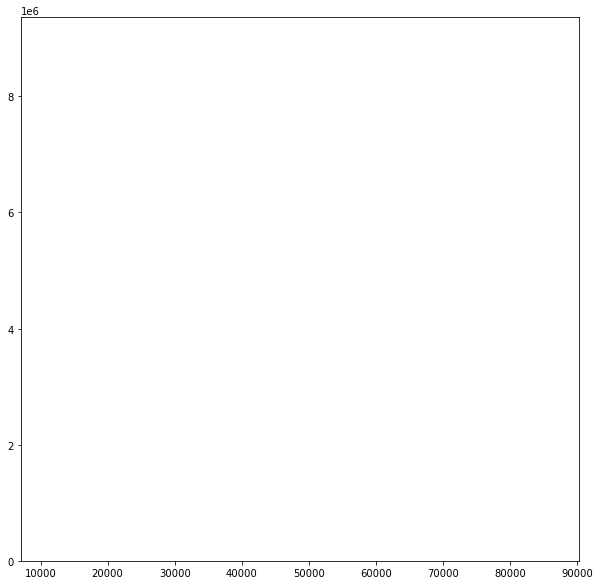

In [131]:
print([int(i) for i in bins_custom[0::2]])
print(list(n[0::2]))
plt.figure(figsize=(10,10))

In [121]:
import seaborn as sns

<AxesSubplot:>

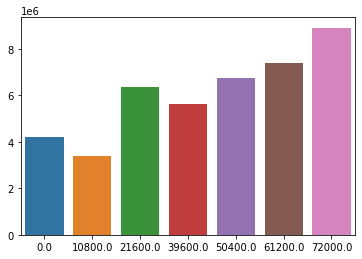

In [129]:

sns.barplot(y=n[0::2],x=bins_custom[0::2])


In [63]:
df=pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_posts.csv',usecols=['cts'],sep='\t',nrows=10000)
df=pre_posts(df)
print(df.cts)
df.cts=df.cts.dt.hour*3600+df.cts.dt.minute*60+df.cts.dt.second
print(df.cts.values)

0      2017-08-06 20:06:57+00:00
1      2017-06-19 09:31:16+00:00
2      2017-03-11 20:05:03+00:00
3      2016-09-13 16:27:16+00:00
4      2015-10-18 10:19:27+00:00
                  ...           
9995   2019-03-10 14:46:30+00:00
9996   2019-03-09 12:37:58+00:00
9997   2019-03-03 18:32:29+00:00
9998   2019-02-26 19:57:19+00:00
9999   2018-11-06 14:11:55+00:00
Name: cts, Length: 10000, dtype: datetime64[ns, UTC]
[72417 34276 72303 ... 66749 71839 51115]
